In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
price = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Zillow%20Rent%20Index%2C%202010-Present/price.csv')
price_per_sqft = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Zillow%20Rent%20Index%2C%202010-Present/pricepersqft.csv')

In [4]:
price.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [5]:
flat_price = pd.melt(price, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'])

In [6]:
flat_price.head()

,City Code,City,Metro,County,State,Population Rank,variable,value
0,6181,New York,New York,Queens,NY,1,November 2010,NaN
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,November 2010,2184.0
2,17426,Chicago,Chicago,Cook,IL,3,November 2010,1563.0
3,39051,Houston,Houston,Harris,TX,4,November 2010,1198.0
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,November 2010,1092.0


In [7]:
flat_price.dropna(inplace=True)

In [8]:
top10 = flat_price[flat_price['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=False) \
                .head(10)

[Text(0, 0, 'Jupiter Island FL'),
 Text(1, 0, 'Atherton CA'),
 Text(2, 0, 'Fisher Island FL'),
 Text(3, 0, 'Hidden Hills CA'),
 Text(4, 0, 'Rolling Hills CA'),
 Text(5, 0, 'Hillsborough CA'),
 Text(6, 0, 'Belvedere CA'),
 Text(7, 0, 'Sea Island GA'),
 Text(8, 0, 'Westlake TX'),
 Text(9, 0, 'Portola Valley CA')]

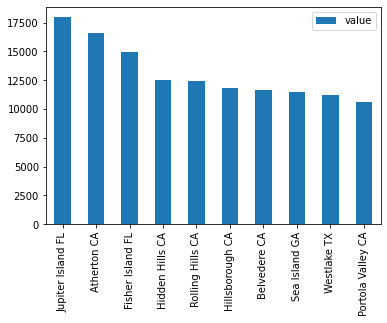

In [9]:
top10['City_State'] = top10['City'] + ' ' + top10['State']
ax = top10[['City_State', 'value']].plot(kind='bar', use_index=False)
ax.set_xticklabels(top10['City_State'])

In [10]:
flat_price['date'] = pd.to_datetime(flat_price['variable'])

In [11]:
flat_price.sort_values(by=['City Code', 'date']).head(10)

,City Code,City,Metro,County,State,Population Rank,variable,value,date
60120,3300,Aberdeen,Blackfoot,Bingham,ID,7597,March 2011,782.0,2011-03-01
73251,3300,Aberdeen,Blackfoot,Bingham,ID,7597,April 2011,777.0,2011-04-01
86382,3300,Aberdeen,Blackfoot,Bingham,ID,7597,May 2011,775.0,2011-05-01
99513,3300,Aberdeen,Blackfoot,Bingham,ID,7597,June 2011,777.0,2011-06-01
112644,3300,Aberdeen,Blackfoot,Bingham,ID,7597,July 2011,785.0,2011-07-01
125775,3300,Aberdeen,Blackfoot,Bingham,ID,7597,August 2011,791.0,2011-08-01
138906,3300,Aberdeen,Blackfoot,Bingham,ID,7597,September 2011,793.0,2011-09-01
152037,3300,Aberdeen,Blackfoot,Bingham,ID,7597,October 2011,790.0,2011-10-01
165168,3300,Aberdeen,Blackfoot,Bingham,ID,7597,November 2011,789.0,2011-11-01
178299,3300,Aberdeen,Blackfoot,Bingham,ID,7597,December 2011,787.0,2011-12-01
